# Загрузка Pandas и очистка данных

In [1]:
import pandas as pd
import operator
import math
import datetime
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv('main_task.csv')
df_ = pd.read_csv('main_task.csv')
display(df.head(3)) # просмотр исходных данных
display(df.columns)

colon = ['Id', 'City', 'Cuisine', 'Ranking', 'Rating', 'Price', 'Num_Reviews', 'Reviews', 'URL_TA', 'Id_TA']
df.columns = colon
df_.columns = colon

display(df.head(6))
display(df.info())
display(df.Reviews[1])
display(df.URL_TA[1])
display(df.Reviews[3])
display(df.URL_TA[2])
#display(df.Price.value_counts())
#display(df.City.value_counts())
#display(df.Cuisine.value_counts())

display(df.duplicated().value_counts()) # проверка на повторы

print('Rating',df.Rating.min(),df.Rating.max())

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781


Index(['Restaurant_id', 'City', 'Cuisine Style', 'Ranking', 'Rating',
       'Price Range', 'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA'],
      dtype='object')

,Id,City,Cuisine,Ranking,Rating,Price,Num_Reviews,Reviews,URL_TA,Id_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
5,id_1418,Oporto,NaN,1419.0,3.0,NaN,2.0,"[['There are better 3 star hotel bars', 'Amazi...",/Restaurant_Review-g189180-d12503536-Reviews-D...,d12503536


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           40000 non-null  object 
 1   City         40000 non-null  object 
 2   Cuisine      30717 non-null  object 
 3   Ranking      40000 non-null  float64
 4   Rating       40000 non-null  float64
 5   Price        26114 non-null  object 
 6   Num_Reviews  37457 non-null  float64
 7   Reviews      40000 non-null  object 
 8   URL_TA       40000 non-null  object 
 9   Id_TA        40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


None

"[['Unique cuisine', 'Delicious Nepalese food'], ['07/06/2017', '06/19/2016']]"

'/Restaurant_Review-g189852-d7992032-Reviews-Buddha_Nepal-Stockholm.html'

'[[], []]'

'/Restaurant_Review-g186338-d8632781-Reviews-ROKA_Mayfair-London_England.html'

False    40000
dtype: int64

Rating 1.0 5.0


## Код по очистке данных и генерации новых признаков

In [3]:
df_N=pd.DataFrame(columns = ['City','Cuisine','Reviews','URL_TA'])
df_N[['City','Cuisine','Reviews','URL_TA']]=df_[['City','Cuisine','Reviews','URL_TA']] # таблица номинативных переменных
display(df_N.head(3))
df.drop(['City','Cuisine','Reviews','URL_TA'], axis='columns', inplace=True) # таблица численных переменных
display(df.head(3))

,City,Cuisine,Reviews,URL_TA
0,Paris,"['European', 'French', 'International']","[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...
1,Stockholm,NaN,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...
2,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...","[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...


,Id,Ranking,Rating,Price,Num_Reviews,Id_TA
0,id_5569,5570.0,3.5,$$ - $$$,194.0,d1912643
1,id_1535,1537.0,4.0,NaN,10.0,d7992032
2,id_352,353.0,4.5,$$$$,688.0,d8632781


In [4]:
df['Id'] = df_.Id.apply(lambda x: int(x[3:])) # преобразование данных столбцов Id, Id_TA и Num_Reviews в формат int
df['Id_TA'] = df_.Id_TA.apply(lambda x: int(x[1:]))
df['Num_Reviews'] = df_.Num_Reviews.fillna(value=0)
df['Num_Reviews'] = df.Num_Reviews.apply(lambda x: int(x))
display(df.head(6))
#display(df.Num_Reviews.value_counts())

,Id,Ranking,Rating,Price,Num_Reviews,Id_TA
0,5569,5570.0,3.5,$$ - $$$,194,1912643
1,1535,1537.0,4.0,NaN,10,7992032
2,352,353.0,4.5,$$$$,688,8632781
3,3456,3458.0,5.0,NaN,3,1358776
4,615,621.0,4.0,$$ - $$$,84,6864963
5,1418,1419.0,3.0,NaN,2,12503536


In [5]:
df['Price'] = df_.Price.fillna(value=0) # задание цены в о.е. и производных значений
df['Price'] = df.Price.apply(lambda x: 1 if x=='$' else 3 if x=='$$$$' else 0 if x==0 else 2) 
#df['Price_2'] = df.Price.apply(lambda x: x**2)
#df['Price_3'] = df.Price.apply(lambda x: x**3)
#df['Price_exp'] = df.Price.apply(lambda x: math.exp(x))
df['Price'] = df.Price.apply(lambda x: math.log(x) if x!=0 else 0)
#df['Price_1'] = df.Price.apply(lambda x: 1/x)

display(df.head(6))

,Id,Ranking,Rating,Price,Num_Reviews,Id_TA
0,5569,5570.0,3.5,0.693147,194,1912643
1,1535,1537.0,4.0,0.000000,10,7992032
2,352,353.0,4.5,1.098612,688,8632781
3,3456,3458.0,5.0,0.000000,3,1358776
4,615,621.0,4.0,0.693147,84,6864963
5,1418,1419.0,3.0,0.000000,2,12503536


In [6]:
df['Id__TA'] = df_N.URL_TA # вычленение из колонки URL_TA нетиповой информации
df['Id__TA'] = df.Id__TA.apply(lambda x: int(x[x.find('g') + 1 : x.find('g') + 7])) # добавление колонки с доп. идентификатором
df_N['Area'] = df_N.URL_TA
df_N['Area'] = df_N.Area.apply(lambda x: x[x.rfind('-') + 1 : ])
df_N['Area'] = df_N.Area.apply(lambda x: x[x.rfind('_') + 1 : x.rfind('.')] if x.find('_')!=-1 else 'Area')

#display(df.head(3))
#display(df_N.head(3))
#display(df_N.Area.value_counts())
display(df_N.City.value_counts())
#print(sorted(df_N.City.unique()))

#display(df_N[df_N.Area == 'Geneva'].URL_TA.value_counts())
#display(df_N[df_N.Area == 'Po']) # .City.value_counts())
#display(df_N[df_N.City == 'Ljubljana'].Area.value_counts())

def rep_area(x):
    if x=='Portug' or x=='Por' or x=='Norther' or x=='Portuga' or x=='Centra': # or x=='Po'
        return 'Portugal'
    elif x=='Polan' or x=='' or x=='P' or x=='Pol' or x=='Lesser': # or x=='Po'
        return 'Poland'
    elif x=='Alp' or x=='Rhone':
        return 'Alpes'
    elif x=='Catalo' or x=='Cat':
        return 'Catalonia'
    elif x=='Provinc' or x=='Provin' or x=='Pro':
        return 'Province'
    elif x=='Bavari':
        return 'Bavaria'
    else:
        return x
df_N['Area'] = df_N.Area.apply(rep_area) # добавление колонки с географическими областями, в которых находятся рестораны
df_N.loc[34120, 'Area'] = 'Poland'
df_N.loc[6944, 'Area'] = 'Portugal'

fl=0 # 0/1 # области представленные несколькими городами
if fl==1:
    C=df_N.Area.unique()
    #print(C)
    for i in C:
        if len(df_N[df_N.Area == i].City.unique())<2:
            df_N['Area'] = df_N.Area.apply(lambda x: 'City' if x==i else x)
        if i=='Region' or i=='Area':
            df_N['Area'] = df_N.Area.apply(lambda x: 'City' if x==i else x)

display(df_N.Area.value_counts())

fl=0 # 0/1 # добалнение столбцов с городами, в которых находятся рестораны, в табал. с численными значениями
if fl==1:
    for i in df_N.City.unique():
        df[i] = df_N.City.apply(lambda x: 1 if x==i else 0)
display(df.head(10))

London        5757
Paris         4897
Madrid        3108
Barcelona     2734
Berlin        2155
Milan         2133
Rome          2078
Prague        1443
Lisbon        1300
Vienna        1166
Amsterdam     1086
Brussels      1060
Hamburg        949
Munich         893
Lyon           892
Stockholm      820
Budapest       816
Warsaw         727
Dublin         673
Copenhagen     659
Athens         628
Edinburgh      596
Zurich         538
Oporto         513
Geneva         481
Krakow         443
Oslo           385
Helsinki       376
Bratislava     301
Luxembourg     210
Ljubljana      183
Name: City, dtype: int64

Area         9925
England      5757
France       4897
Catalonia    2734
Lombardy     2133
Lazio        2078
Portugal     1813
Bohemia      1443
Poland       1170
Province     1086
Alpes         892
Bavaria       892
Hungary       816
Dublin        673
Zealand       659
Attica        628
Scotland      596
Region        484
Norway        385
Uusimaa       376
Brussels      293
City          210
Geneva         38
Zurich         22
Name: Area, dtype: int64

,Id,Ranking,Rating,Price,Num_Reviews,Id_TA,Id__TA
0,5569,5570.0,3.5,0.693147,194,1912643,187147
1,1535,1537.0,4.0,0.000000,10,7992032,189852
2,352,353.0,4.5,1.098612,688,8632781,186338
3,3456,3458.0,5.0,0.000000,3,1358776,187323
4,615,621.0,4.0,0.693147,84,6864963,187309
5,1418,1419.0,3.0,0.000000,2,12503536,189180
6,1720,1722.0,4.0,0.000000,50,5808504,187849
7,825,826.0,3.0,0.000000,9,3199765,274924
8,2690,2692.0,4.0,0.000000,0,12845029,190454
9,4209,4210.0,4.0,0.000000,55,8020681,187791


In [7]:
df_N['Cuisine'] = df_.Cuisine.fillna(value='Not') # формирование списка Cuisine_type
C_type=[]
C=df_N.Cuisine.unique()
#print(C)
for i in C:
    if i!='Not':
        i=i[1:-1]
        i = i.split(', ')
        C_type = C_type + i
C_type=set(C_type)
#print(C_type)

Cuisine_type=[] # анализ частоты упоминания Cuisine_type в таблице
Sp_N_Cuisine_type={}
for i in C_type:
    #i=i[1:-1]
    N_Cuisine_type=df_N.Cuisine.apply(lambda x: x.count(i)).sum()
    Sp_N_Cuisine_type[i]=N_Cuisine_type
    Cuisine_type.append(i)
print(sorted(Cuisine_type))
print(len(Cuisine_type))
print(sorted(Sp_N_Cuisine_type.items(), key=operator.itemgetter(1)))

df['Num_Cuisine'] = df_N.Cuisine.apply(lambda x: x.count(',')+1) # добавление колонки с кол-вом Cuisine_type в ресторане
print(df.Num_Cuisine.mean())

fl=0 # 0/1 # добалнение столбцов с типами кухонь в ресторанах в табл. с числовыми данными
if fl==1:
    for i in Cuisine_type:
        df[i] = df_N.Cuisine.apply(lambda x: 1 if x.find(i)!=-1 else 0)
    df['International'] = df['International']+df_N.Cuisine.apply(lambda x: 1 if x=='Not' else 0)

fl=0 # 0/1 # группировка типов кухонь в ресторанах
if fl==1:
    df['European']=df['Central European']+df['Eastern European']+df['European']
    df['European']=df.European.apply(lambda x: 1 if x>0 else 0)
    df['Asian']=df['Asian']+df['Central Asian']
    df['Asian']=df.Asian.apply(lambda x: 1 if x>0 else 0)
    df['FastFood']=df['Fast Food']+df['Street Food']
    df['FastFood']=df.FastFood.apply(lambda x: 1 if x>0 else 0)
    df['Vegetarian']=df['Vegan Options']+df['Vegetarian Friendly']
    df['Vegetarian']=df.Vegetarian.apply(lambda x: 1 if x>0 else 0)
    df=df.drop(['Central European','Eastern European','Central Asian','Fast Food','Street Food','Vegan Options','Vegetarian Friendly'],axis=1)
    df['National']=df['Afghani']+df['African']+df['Albanian']+df['American']+df['Arabic']+df['Argentinean']+df['Armenian']
    +df['Australian']+df['Austrian']+df['Azerbaijani']+df['Balti']+df['Bangladeshi']+df['Belgian']+df['Brazilian']+df['British']
    +df['Burmese']+df['Cajun & Creole']+df['Cambodian']+df['Canadian']+df['Caribbean']+df['Caucasian']+df['Central American']
    +df['Chilean']+df['Chinese']+df['Colombian']+df['Croatian']+df['Cuban']+df['Czech']+df['Danish']+df['Dutch']+df['Ecuadorean']
    +df['Egyptian']+df['Ethiopian']+df['Filipino']+df['French']+df['Fujian']+df['Georgian']+df['German']+df['Greek']
    +df['Hawaiian']+df['Hungarian']+df['Indian']+df['Indonesian']+df['Irish']+df['Israeli']+df['Italian']+df['Jamaican']
    +df['Japanese']+df['Korean']+df['Kosher']+df['Latin']+df['Latvian']+df['Lebanese']+df['Malaysian']+df['Mexican']
    +df['Minority Chinese']+df['Mongolian']+df['Moroccan']+df['Native American']+df['Nepali']+df['New Zealand']
    +df['Norwegian']+df['Pakistani']+df['Persian']+df['Peruvian']+df['Polish']+df['Polynesian']+df['Portuguese']
    +df['Romanian']+df['Russian']+df['Salvadoran']+df['Scandinavian']+df['Scottish']+df['Singaporean']+df['Slovenian']
    +df['South American']+df['Southwestern']+df['Spanish']+df['Sri Lankan']+df['Swedish']+df['Swiss']+df['Taiwanese']+df['Thai']
    +df['Tibetan']+df['Tunisian']+df['Turkish']+df['Ukrainian']+df['Uzbek']+df['Venezuelan']+df['Vietnamese']+df['Welsh']
    +df['Xinjiang']+df['Yunnan']
    df['National']=df.National.apply(lambda x: 1 if x>0 else 0)
    df=df.drop(['Afghani', 'African', 'Albanian', 'American', 'Arabic', 'Argentinean', 'Armenian', 'Australian', 'Austrian', 'Azerbaijani', 'Balti', 'Bangladeshi', 'Belgian', 'Brazilian', 'British', 'Burmese', 'Cajun & Creole', 'Cambodian', 'Canadian', 'Caribbean', 'Caucasian', 'Central American', 'Chilean', 'Chinese', 'Colombian', 'Croatian', 'Cuban', 'Czech', 'Danish', 'Dutch',  'Ecuadorean', 'Egyptian', 'Ethiopian', 'Filipino', 'French', 'Fujian', 'Georgian', 'German', 'Greek', 'Hawaiian', 'Hungarian', 'Indian', 'Indonesian', 'Irish', 'Israeli', 'Italian', 'Jamaican', 'Japanese', 'Korean', 'Kosher', 'Latin', 'Latvian', 'Lebanese', 'Malaysian', 'Mexican', 'Minority Chinese', 'Mongolian', 'Moroccan', 'Native American', 'Nepali', 'New Zealand', 'Norwegian', 'Pakistani', 'Persian', 'Peruvian', 'Polish', 'Polynesian', 'Portuguese', 'Romanian', 'Russian', 'Salvadoran', 'Scandinavian', 'Scottish', 'Singaporean', 'Slovenian', 'South American', 'Southwestern', 'Spanish', 'Sri Lankan',  'Swedish', 'Swiss', 'Taiwanese', 'Thai', 'Tibetan', 'Tunisian', 'Turkish', 'Ukrainian', 'Uzbek', 'Venezuelan', 'Vietnamese', 'Welsh', 'Xinjiang', 'Yunnan'],axis=1)
    display(df['European'].max(),df['Asian'].max(),df['FastFood'].max(),df['Vegetarian'].max(),df['National'].max(),df['International'].max())

#display(df_N.head(10))
display(df.head(10))

["'Afghani'", "'African'", "'Albanian'", "'American'", "'Arabic'", "'Argentinean'", "'Armenian'", "'Asian'", "'Australian'", "'Austrian'", "'Azerbaijani'", "'Balti'", "'Bangladeshi'", "'Bar'", "'Barbecue'", "'Belgian'", "'Brazilian'", "'Brew Pub'", "'British'", "'Burmese'", "'Cafe'", "'Cajun & Creole'", "'Cambodian'", "'Canadian'", "'Caribbean'", "'Caucasian'", "'Central American'", "'Central Asian'", "'Central European'", "'Chilean'", "'Chinese'", "'Colombian'", "'Contemporary'", "'Croatian'", "'Cuban'", "'Czech'", "'Danish'", "'Delicatessen'", "'Diner'", "'Dutch'", "'Eastern European'", "'Ecuadorean'", "'Egyptian'", "'Ethiopian'", "'European'", "'Fast Food'", "'Filipino'", "'French'", "'Fujian'", "'Fusion'", "'Gastropub'", "'Georgian'", "'German'", "'Gluten Free Options'", "'Greek'", "'Grill'", "'Halal'", "'Hawaiian'", "'Healthy'", "'Hungarian'", "'Indian'", "'Indonesian'", "'International'", "'Irish'", "'Israeli'", "'Italian'", "'Jamaican'", "'Japanese'", "'Korean'", "'Kosher'", "'L

,Id,Ranking,Rating,Price,Num_Reviews,Id_TA,Id__TA,Num_Cuisine
0,5569,5570.0,3.5,0.693147,194,1912643,187147,3
1,1535,1537.0,4.0,0.000000,10,7992032,189852,1
2,352,353.0,4.5,1.098612,688,8632781,186338,7
3,3456,3458.0,5.0,0.000000,3,1358776,187323,1
4,615,621.0,4.0,0.693147,84,6864963,187309,3
5,1418,1419.0,3.0,0.000000,2,12503536,189180,1
6,1720,1722.0,4.0,0.000000,50,5808504,187849,2
7,825,826.0,3.0,0.000000,9,3199765,274924,1
8,2690,2692.0,4.0,0.000000,0,12845029,190454,1
9,4209,4210.0,4.0,0.000000,55,8020681,187791,3


In [8]:
# формирование колонок на основе информации о датах отзывов
df['Reviews_data1'] = df_N.Reviews.apply(lambda x: x[x.rfind('[')+2:x.rfind('[')+12] if x.count('/')>0 else 0) 
df['Reviews_data2'] = df_N.Reviews.apply(lambda x: x[x.rfind('/')-5:x.rfind('/')+5] if x.count('/')>0 else 0)
display(df.head(3))

df['Reviews_data1'] = pd.to_datetime(df['Reviews_data1'])
df['Reviews_data2'] = pd.to_datetime(df['Reviews_data2'])

fl=0 # 0/1
if fl==1:
    df['data1_dayofweek']=df['Reviews_data1'].dt.dayofweek
    df['data2_dayofweek']=df['Reviews_data2'].dt.dayofweek
    df['data1_month']=df['Reviews_data1'].dt.month
    df['data2_month']=df['Reviews_data2'].dt.month

    df['data1_dayofweek']=df.data1_dayofweek.apply(lambda x: 1 if x<5 else 2)
    df['data2_dayofweek']=df.data2_dayofweek.apply(lambda x: 1 if x<5 else 2)
    df['data1_dayofweek']=df['data1_dayofweek']*df.Reviews_data1.apply(lambda x: 0 if x==0 else 1)
    df['data2_dayofweek']=df['data2_dayofweek']*df.Reviews_data2.apply(lambda x: 0 if x==0 else 1)
    df['data1_month']=df.data1_month.apply(lambda x: 1 if x>2 and x<6 else 2 if x>5 and x<9 else 3 if x>8 and x<12 else 4)
    df['data2_month']=df.data2_month.apply(lambda x: 1 if x>2 and x<6 else 2 if x>5 and x<9 else 3 if x>8 and x<12 else 4)
    df['data1_month']=df['data1_month']*df.Reviews_data1.apply(lambda x: 0 if x==0 else 1)
    df['data2_month']=df['data2_month']*df.Reviews_data2.apply(lambda x: 0 if x==0 else 1)
    
    #df['data1_year']=df['Reviews_data1'].dt.year
    #df['data1_day']=df['Reviews_data1'].dt.day
    #df['data2_year']=df['Reviews_data2'].dt.year
    #df['data2_day']=df['Reviews_data2'].dt.day
    
    df['dayweek1_n']=df.data1_dayofweek.apply(lambda x: 1 if x==0 else 0) # выходные/будни и времена года номинативные переменные
    df['dayweek1_VXD']=df.data1_dayofweek.apply(lambda x: 1 if x==2 else 0)
    df['dayweek1_BD']=df.data1_dayofweek.apply(lambda x: 1 if x==1 else 0)
    df['dayweek2_n']=df.data2_dayofweek.apply(lambda x: 1 if x==0 else 0)
    df['dayweek2_VXD']=df.data2_dayofweek.apply(lambda x: 1 if x==2 else 0)
    df['dayweek2_BD']=df.data2_dayofweek.apply(lambda x: 1 if x==1 else 0)
    
    df['month1_n']=df.data1_month.apply(lambda x: 1 if x==0 else 0)
    df['month1_VS']=df.data1_month.apply(lambda x: 1 if x==1 else 0)
    df['month1_L']=df.data1_month.apply(lambda x: 1 if x==2 else 0)
    df['month1_OS']=df.data1_month.apply(lambda x: 1 if x==3 else 0)
    df['month1_Z']=df.data1_month.apply(lambda x: 1 if x==4 else 0)
    df['month2_n']=df.data2_month.apply(lambda x: 1 if x==0 else 0)
    df['month2_VS']=df.data2_month.apply(lambda x: 1 if x==1 else 0)
    df['month2_L']=df.data2_month.apply(lambda x: 1 if x==2 else 0)
    df['month2_OS']=df.data2_month.apply(lambda x: 1 if x==3 else 0)
    df['month2_Z']=df.data2_month.apply(lambda x: 1 if x==4 else 0)
    #df=df.drop(['data1_dayofweek','data2_dayofweek','data1_month','data2_month'], axis = 1)

df['Reviews_data1'] = (df['Reviews_data1']-pd.to_datetime(0)).dt.days
df['Reviews_data2'] = (df['Reviews_data2']-pd.to_datetime(0)).dt.days
df['data12']=abs(df['Reviews_data1']-df['Reviews_data2'])
df['Reviews_data1'] = df[['Reviews_data1','Reviews_data2']].min(axis=1)

display(df['Reviews_data2'].max(),df['Reviews_data2'].max(),df['data12'].max())
display(df['Reviews_data2'].min(),df['Reviews_data2'].min(),df['data12'].min())

df=df.drop(['Reviews_data2'], axis = 1)

display(df)
display(df.info())

,Id,Ranking,Rating,Price,Num_Reviews,Id_TA,Id__TA,Num_Cuisine,Reviews_data1,Reviews_data2
0,5569,5570.0,3.5,0.693147,194,1912643,187147,3,12/31/2017,11/20/2017
1,1535,1537.0,4.0,0.000000,10,7992032,189852,1,07/06/2017,06/19/2016
2,352,353.0,4.5,1.098612,688,8632781,186338,7,01/08/2018,01/06/2018


17588

17588

3207

0

0

0

,Id,Ranking,Rating,Price,Num_Reviews,Id_TA,Id__TA,Num_Cuisine,Reviews_data1,data12
0,5569,5570.0,3.5,0.693147,194,1912643,187147,3,17490,41
1,1535,1537.0,4.0,0.000000,10,7992032,189852,1,16971,382
2,352,353.0,4.5,1.098612,688,8632781,186338,7,17537,2
3,3456,3458.0,5.0,0.000000,3,1358776,187323,1,0,0
4,615,621.0,4.0,0.693147,84,6864963,187309,3,17216,272
...,...,...,...,...,...,...,...,...,...,...
39995,499,500.0,4.5,0.693147,79,2104414,187849,4,17482,34
39996,6340,6341.0,3.5,0.693147,542,1800036,187147,5,17512,9
39997,1649,1652.0,4.5,0.000000,4,947615,189852,2,13981,3127
39998,640,641.0,4.0,0.693147,70,1100838,274856,5,17335,23


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             40000 non-null  int64  
 1   Ranking        40000 non-null  float64
 2   Rating         40000 non-null  float64
 3   Price          40000 non-null  float64
 4   Num_Reviews    40000 non-null  int64  
 5   Id_TA          40000 non-null  int64  
 6   Id__TA         40000 non-null  int64  
 7   Num_Cuisine    40000 non-null  int64  
 8   Reviews_data1  40000 non-null  int64  
 9   data12         40000 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 3.1 MB


None

In [10]:
# формирование колонок на основе типовых слов в отзывах
# "[['Unique cuisine', 'Delicious Nepalese food'], ['07/06/2017', '06/19/2016']]"

#df_N=df_N.head(1000)
df_N['Reviews_Sl'] = df_N.Reviews.apply(lambda x: x[x.find('[')+2:x.find(']')].lower() if x.count('/')>0 else 'Not')
df_N['Reviews_Sl'] = df_N.Reviews_Sl.apply(lambda x: x.replace(",",""))
df_N['Reviews_Sl'] = df_N.Reviews_Sl.apply(lambda x: x.replace("'",""))
df_N['Reviews_Sl'] = df_N.Reviews_Sl.apply(lambda x: x.replace('"',""))
df_N['Reviews_Sl'] = df_N.Reviews_Sl.apply(lambda x: x.replace("!",""))
df_N['Reviews_Sl'] = df_N.Reviews_Sl.apply(lambda x: x.replace("?",""))
df_N['Reviews_Sl'] = df_N.Reviews_Sl.apply(lambda x: x.replace("...",""))
df_N['Reviews_Sl'] = df_N.Reviews_Sl.apply(lambda x: x.replace(".",""))
df_N['Reviews_Sl'] = df_N.Reviews_Sl.apply(lambda x: x.replace("-",""))
df_N['Reviews_Sl'] = df_N.Reviews_Sl.apply(lambda x: x.replace("(",""))
df_N['Reviews_Sl'] = df_N.Reviews_Sl.apply(lambda x: x.replace(")",""))
##df_N['Reviews_Sl'] = df_N.Reviews_Sl.apply(lambda x: x.replace("\",""))
df_N['Reviews_Sl'] = df_N.Reviews_Sl.apply(lambda x: x.replace("/"," "))
df_N['Reviews_Sl'] = df_N.Reviews_Sl.apply(lambda x: x.lower())
#df_N['Reviews_Sl'] = df_N.Reviews_Sl.apply(lambda x: re.sub("[^a-z]+"," ",x)

fl=0 # 0/1 # формирование списка типовых слов в отзывах
if fl==1:
    display(df_N.Reviews_Sl)
    R_type=[]
    for i in df_N.Reviews_Sl.unique():
        if i!='Not':
            i = i.split(' ')
            R_type = R_type + i
    R_type=set(R_type)
    print(R_type)

    Sp_N_Sl={} # анализ частоты упоминания слов
    for i in R_type:
        if len(i)>2:
            N_Sl=df_N.Reviews_Sl.apply(lambda x: x.count(i)).sum()
            Sp_N_Sl[i]=N_Sl
    print(sorted(Sp_N_Sl.items(), key=lambda x: x[1]))
    
df['Good'] = df_N.Reviews_Sl.apply(lambda x: 0+x.count('100%')+x.count('art')+x.count('alright')+
    x.count('awesome')+x.count('beautifull')+x.count('better')+x.count('best')+x.count('cosy')+x.count('cozy')+
    x.count('care')+x.count('comf')+x.count('charm')+x.count('champ')+x.count('choic')+x.count('classy')+x.count('cool')+
    x.count('dependable')+x.count('divine')+x.count('delight')+x.count('delic')+x.count('excel')+x.count('exellent')+
    x.count('enjo')+x.count('exquis')+x.count('especial')+x.count('extraordinary')+x.count('elegant')+x.count('fav')+
    x.count('friendl')+x.count('flavo')+x.count('foodies')+x.count('fond')+x.count('finest')+x.count('fabulous')+
    x.count('fresh')+x.count('fantastic')+x.count('great')+x.count('gorgeous')+x.count('good')+x.count('glad')+x.count('grand')+
    x.count('hospitality')+x.count('impress')+x.count('improved')+x.count('inspired')+x.count('ideal')+x.count('incred')+
    x.count('joy')+x.count('lik')+x.count('lux')+x.count('lov')+x.count('neat')+x.count('nice')+
    x.count('outstan')+x.count('ok')+x.count('organized')+x.count('pleasur')+x.count('positiv')+x.count('perfe')+
    x.count('professional')+x.count('polite')+x.count('pleasant')+x.count('qual')+x.count('recom')+x.count('relax')+
    x.count('satisf')+x.count('spectacular')+x.count('sophisticated')+x.count('sublime')+x.count('superb')+
    x.count('stunning')+x.count('stylish')+x.count('thank')+x.count('tast')+x.count('terrific')+
    x.count('wow')+x.count('wonde')+x.count('wel')+x.count('yum')+x.count('mmm'))

df['Bad'] = df_N.Reviews_Sl.apply(lambda x: 0+x.count('avo')+x.count('appalling')+x.count('arrogant')+
    x.count('awful')+x.count('avoid')+x.count('bad')+x.count('disappo')+x.count('dissapoint')+
    x.count('dreadful')+x.count('disgusting')+x.count('disaster')+x.count('dirty')+x.count('expec')+
    x.count('fired')+x.count('fail')+x.count('grump')+x.count('horrible')+x.count('igno')+x.count('lack')+
    x.count('medioc')+x.count('overpric')+x.count('overrate')+x.count('orrible')+x.count('pity')+x.count('problem')+x.count('poor')+
    x.count('rude')+x.count('rough')+x.count('sadly')+x.count('sue')+x.count('shame')+x.count('tasteless')+x.count('terrible')+
    x.count('unfortunately')+x.count('unfriendly')+x.count('unassuming')+x.count('unpleasant')+x.count('unpretent')+x.count('urin')+
    x.count('wors')+x.count('nie')+x.count('not')+x.count('no '))
                                  
display(df_N.head(6))
display(df.head(6))

,City,Cuisine,Reviews,URL_TA,Area,Reviews_Sl
0,Paris,"['European', 'French', 'International']","[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,France,good food at your doorstep a good hotel restau...
1,Stockholm,Not,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,Area,unique cuisine delicious nepalese food
2,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...","[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,England,catch up with friends not exceptional
3,Berlin,Not,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,Area,not
4,Munich,"['German', 'Central European', 'Vegetarian Fri...","[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,Bavaria,best place to try a bavarian food nice buildin...
5,Oporto,Not,"[['There are better 3 star hotel bars', 'Amazi...",/Restaurant_Review-g189180-d12503536-Reviews-D...,Portugal,there are better 3 star hotel bars amazing vie...


,Id,Ranking,Rating,Price,Num_Reviews,Id_TA,Id__TA,Num_Cuisine,Reviews_data1,data12,Good,Bad
0,5569,5570.0,3.5,0.693147,194,1912643,187147,3,17490,41,2,0
1,1535,1537.0,4.0,0.000000,10,7992032,189852,1,16971,382,1,0
2,352,353.0,4.5,1.098612,688,8632781,186338,7,17537,2,0,1
3,3456,3458.0,5.0,0.000000,3,1358776,187323,1,0,0,0,1
4,615,621.0,4.0,0.693147,84,6864963,187309,3,17216,272,2,0
5,1418,1419.0,3.0,0.000000,2,12503536,189180,1,17317,108,3,0


In [11]:
display(df.head(3)) # формирование доп. признаков
fl=0 # 0/1
if fl==1:
    df['Price_Rnk'] = (df.Price*df.Ranking).apply(lambda x: math.log(x) if x!=0 else 0)
    df['Price_NRev'] = (df.Price*df.Num_Reviews).apply(lambda x: math.log(x) if x!=0 else 0)
    df['Price_I_T'] = (df.Price*df.Id_TA).apply(lambda x: math.log(x) if x!=0 else 0)
    df['Price_I__T'] = (df.Price*df.Id__TA).apply(lambda x: math.log(x) if x!=0 else 0)
    df['Price_NCuis'] = (df.Price*df.Num_Cuisine).apply(lambda x: math.log(x) if x!=0 else 0)

    df['Rnk_NRev'] = (df.Ranking*df.Num_Reviews).apply(lambda x: math.log(x) if x!=0 else 0)
    df['Rnk_I_T'] = (df.Ranking*df.Id_TA).apply(lambda x: math.log(x) if x!=0 else 0)
    df['Rnk_I__T'] = (df.Ranking*df.Id__TA).apply(lambda x: math.log(x) if x!=0 else 0)
    df['Rnk_NCuis'] = (df.Ranking*df.Num_Cuisine).apply(lambda x: math.log(x) if x!=0 else 0)

    df['NRev_I_T'] = (df.Num_Reviews*df.Id_TA).apply(lambda x: math.log(x) if x!=0 else 0)
    df['NRev_I__T'] = (df.Num_Reviews*df.Id__TA).apply(lambda x: math.log(x) if x!=0 else 0)
    df['NRev_NCuis'] = (df.Num_Reviews*df.Num_Cuisine).apply(lambda x: math.log(x) if x!=0 else 0)

    df['NCuis_I_T'] = (df.Num_Cuisine*df.Id_TA).apply(lambda x: math.log(x) if x!=0 else 0)
    df['NCuis_I__T'] = (df.Num_Cuisine*df.Id__TA).apply(lambda x: math.log(x) if x!=0 else 0)

    df['I_T_I__T'] = (df.Id_TA*df.Id__TA).apply(lambda x: math.log(x) if x!=0 else 0)

#df['Ranking_1'] = df.Ranking.apply(lambda x: 1/x)
#df['Ranking_2'] = df.Ranking.apply(lambda x: x**2)
df['Ranking'] = df.Ranking.apply(lambda x: math.log(x) if x!=0 else 0)
#df['Num_Reviews_1'] = df.Num_Reviews.apply(lambda x: 1/x if x!=0 else 0)
#df['Num_Reviews_2'] = df.Num_Reviews.apply(lambda x: x**2)
df['Num_Reviews'] = df.Num_Reviews.apply(lambda x: math.log(x) if x!=0 else 0)
#df['Id_TA_1'] = df.Id_TA.apply(lambda x: 1/x)
#df['Id_TA_2'] = df.Id_TA.apply(lambda x: x**2)
df['Id_TA'] = df.Id_TA.apply(lambda x: math.log(x) if x!=0 else 0)
#df['Id__TA_1'] = df.Id__TA.apply(lambda x: 1/x)
#df['Id__TA_2'] = df.Id__TA.apply(lambda x: x**2)
df['Id__TA'] = df.Id__TA.apply(lambda x: math.log(x) if x!=0 else 0)
#df['Num_Cuisine_1'] = df.Num_Cuisine.apply(lambda x: 1/x)
#df['Num_Cuisine_2'] = df.Num_Cuisine.apply(lambda x: x**2)
df['Num_Cuisine'] = df.Num_Cuisine.apply(lambda x: math.log(x) if x!=0 else 0)

fl=0 #0/1
if fl==1:
    df['Reviews_data1'] = df.Reviews_data1.apply(lambda x: math.log(x) if x!=0 else 0)
    df['data12'] = df.data12.apply(lambda x: math.log(x) if x!=0 else 0)

display(df.head(3))

,Id,Ranking,Rating,Price,Num_Reviews,Id_TA,Id__TA,Num_Cuisine,Reviews_data1,data12,Good,Bad
0,5569,5570.0,3.5,0.693147,194,1912643,187147,3,17490,41,2,0
1,1535,1537.0,4.0,0.000000,10,7992032,189852,1,16971,382,1,0
2,352,353.0,4.5,1.098612,688,8632781,186338,7,17537,2,0,1


,Id,Ranking,Rating,Price,Num_Reviews,Id_TA,Id__TA,Num_Cuisine,Reviews_data1,data12,Good,Bad
0,5569,8.625150,3.5,0.693147,5.267858,14.463997,12.139650,1.098612,17490,41,2,0
1,1535,7.337588,4.0,0.000000,2.302585,15.893956,12.154000,0.000000,16971,382,1,0
2,352,5.866468,4.5,1.098612,6.533789,15.971077,12.135318,1.945910,17537,2,0,1


In [12]:
# звёзды Мишлен по странам
display(df.head(3))
df['Britain']=df_N.City.apply(lambda x: 1 if x=='London' or x=='Edinburgh' else 0)
df['MSHL']=df.Britain.apply(lambda x: 7 if x==1 else 0)
df['France']=df_N.City.apply(lambda x: 1 if x=='Paris' or x=='Lyon' else 0)
df['MSHL']=df.MSHL+df.France.apply(lambda x: 9 if x==1 else 0)
df['Spain']=df_N.City.apply(lambda x: 1 if x=='Madrid' or x=='Barcelona' else 0)
df['MSHL']=df.MSHL+df.Spain.apply(lambda x: 9 if x==1 else 0)
df['Germany']=df_N.City.apply(lambda x: 1 if x=='Berlin' or x=='Hamburg' or x=='Munich' else 0)
df['MSHL']=df.MSHL+df.Germany.apply(lambda x: 9 if x==1 else 0)
df['Italy']=df_N.City.apply(lambda x: 1 if x=='Milan' or x=='Rome' else 0)
df['MSHL']=df.MSHL+df.Italy.apply(lambda x: 8 if x==1 else 0)
df['Czech']=df_N.City.apply(lambda x: 1 if x=='Prague' else 0)
df['MSHL']=df.MSHL+df.Czech.apply(lambda x: 0 if x==1 else 0)
df['Portugal']=df_N.City.apply(lambda x: 1 if x=='Lisbon' or x=='Oporto' else 0)
df['MSHL']=df.MSHL+df.Portugal.apply(lambda x: 0 if x==1 else 0)
df['Austria']=df_N.City.apply(lambda x: 1 if x=='Vienna' else 0)
df['MSHL']=df.MSHL+df.Austria.apply(lambda x: 0 if x==1 else 0)
df['Netherlands']=df_N.City.apply(lambda x: 1 if x=='Amsterdam' else 0)
df['MSHL']=df.MSHL+df.Netherlands.apply(lambda x: 0 if x==1 else 0)
df['Belgium']=df_N.City.apply(lambda x: 1 if x=='Brussels' else 0)
df['MSHL']=df.MSHL+df.Belgium.apply(lambda x: 1 if x==1 else 0)
df['Sweden']=df_N.City.apply(lambda x: 1 if x=='Stockholm' or x=='Zurich' else 0)
df['MSHL']=df.MSHL+df.Sweden.apply(lambda x: 0 if x==1 else 0)
df['Hungary']=df_N.City.apply(lambda x: 1 if x=='Budapest' else 0)
df['MSHL']=df.MSHL+df.Hungary.apply(lambda x: 0 if x==1 else 0)
df['Poland']=df_N.City.apply(lambda x: 1 if x=='Warsaw' or x=='Krakow' else 0)
df['MSHL']=df.MSHL+df.Poland.apply(lambda x: 0 if x==1 else 0)
df['Ireland']=df_N.City.apply(lambda x: 1 if x=='Dublin' else 0)
df['MSHL']=df.MSHL+df.Ireland.apply(lambda x: 0 if x==1 else 0)
df['Denmark']=df_N.City.apply(lambda x: 1 if x=='Copenhagen' else 0)
df['MSHL']=df.MSHL+df.Denmark.apply(lambda x: 1 if x==1 else 0)
df['Greece']=df_N.City.apply(lambda x: 1 if x=='Athens' else 0)
df['MSHL']=df.MSHL+df.Greece.apply(lambda x: 0 if x==1 else 0)
df['Switzerland']=df_N.City.apply(lambda x: 1 if x=='Geneva' else 0)
df['MSHL']=df.MSHL+df.Switzerland.apply(lambda x: 0 if x==1 else 0)
df['Norway']=df_N.City.apply(lambda x: 1 if x=='Oslo' else 0)
df['MSHL']=df.MSHL+df.Norway.apply(lambda x: 0 if x==1 else 0)
df['Finland']=df_N.City.apply(lambda x: 1 if x=='Helsinki' else 0)
df['MSHL']=df.MSHL+df.Finland.apply(lambda x: 0 if x==1 else 0)
df['Slovakia']=df_N.City.apply(lambda x: 1 if x=='Bratislava' else 0)
df['MSHL']=df.MSHL+df.Slovakia.apply(lambda x: 0 if x==1 else 0)
df['Slovenia']=df_N.City.apply(lambda x: 1 if x=='Ljubljana' else 0)
df['MSHL']=df.MSHL+df.Slovenia.apply(lambda x: 0 if x==1 else 0)
df['Luxembourg']=df_N.City.apply(lambda x: 1 if x=='Luxembourg' else 0)
df['MSHL']=df.MSHL+df.Luxembourg.apply(lambda x: 0 if x==1 else 0)
display(df.head(3))
print(df['MSHL'].sum())

,Id,Ranking,Rating,Price,Num_Reviews,Id_TA,Id__TA,Num_Cuisine,Reviews_data1,data12,Good,Bad
0,5569,8.625150,3.5,0.693147,5.267858,14.463997,12.139650,1.098612,17490,41,2,0
1,1535,7.337588,4.0,0.000000,2.302585,15.893956,12.154000,0.000000,16971,382,1,0
2,352,5.866468,4.5,1.098612,6.533789,15.971077,12.135318,1.945910,17537,2,0,1


,Id,Ranking,Rating,Price,Num_Reviews,Id_TA,Id__TA,Num_Cuisine,Reviews_data1,data12,...,Poland,Ireland,Denmark,Greece,Switzerland,Norway,Finland,Slovakia,Slovenia,Luxembourg
0,5569,8.625150,3.5,0.693147,5.267858,14.463997,12.139650,1.098612,17490,41,...,0,0,0,0,0,0,0,0,0,0
1,1535,7.337588,4.0,0.000000,2.302585,15.893956,12.154000,0.000000,16971,382,...,0,0,0,0,0,0,0,0,0,0
2,352,5.866468,4.5,1.098612,6.533789,15.971077,12.135318,1.945910,17537,2,...,0,0,0,0,0,0,0,0,0,0


220530


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             40000 non-null  int64  
 1   Ranking        40000 non-null  float64
 2   Rating         40000 non-null  float64
 3   Price          40000 non-null  float64
 4   Num_Reviews    40000 non-null  float64
 5   Id_TA          40000 non-null  float64
 6   Id__TA         40000 non-null  float64
 7   Num_Cuisine    40000 non-null  float64
 8   Reviews_data1  40000 non-null  int64  
 9   data12         40000 non-null  int64  
 10  Good           40000 non-null  int64  
 11  Bad            40000 non-null  int64  
 12  Britain        40000 non-null  int64  
 13  MSHL           40000 non-null  int64  
 14  France         40000 non-null  int64  
 15  Spain          40000 non-null  int64  
 16  Germany        40000 non-null  int64  
 17  Italy          40000 non-null  int64  
 18  Czech 

None

,Id,Ranking,Rating,Price,Num_Reviews,Id_TA,Id__TA,Num_Cuisine,Reviews_data1,data12,...,Poland,Ireland,Denmark,Greece,Switzerland,Norway,Finland,Slovakia,Slovenia,Luxembourg
0,0.339118,0.888484,0.625,0.63093,0.574107,0.345895,0.256409,0.360849,0.994428,0.012785,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.093472,0.755851,0.750,0.00000,0.250942,0.824393,0.262974,0.000000,0.964919,0.119114,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.021435,0.604310,0.875,1.00000,0.712071,0.850200,0.254427,0.639151,0.997100,0.000624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Id,Ranking,Rating,Price,Num_Reviews,Id_TA,Id__TA,Num_Cuisine,Reviews_data1,data12,...,Poland,Ireland,Denmark,Greece,Switzerland,Norway,Finland,Slovakia,Slovenia,Luxembourg
Id,1.000000,0.808307,-0.368308,-0.216903,-0.331088,0.069022,-0.182472,-0.319149,-0.118526,0.065667,...,-0.130218,-0.094986,-0.094284,-0.095171,-0.088341,-0.082594,-0.081647,-0.075655,-0.062802,-0.065853
Ranking,0.808307,1.000000,-0.335385,-0.303601,-0.461892,0.135313,-0.180039,-0.436280,-0.215491,0.092731,...,-0.152809,-0.098898,-0.101258,-0.105329,-0.112271,-0.118929,-0.114628,-0.117184,-0.125527,-0.120610
Rating,-0.368308,-0.335385,1.000000,0.026338,-0.008278,0.131418,0.019144,0.109398,0.031317,-0.065990,...,0.030663,0.013431,-0.001443,0.044792,-0.005027,-0.014680,-0.006737,-0.002988,0.012068,-0.008559
Price,-0.216903,-0.303601,0.026338,1.000000,0.575822,-0.303065,-0.034115,0.539745,0.314962,-0.022040,...,-0.018777,0.014150,0.013687,-0.007924,0.032909,0.019201,0.002717,-0.023217,0.001771,0.021966
Num_Reviews,-0.331088,-0.461892,-0.008278,0.575822,1.000000,-0.472139,-0.064362,0.642271,0.470567,-0.002917,...,-0.042692,0.019782,-0.001058,-0.024551,-0.016126,-0.001509,-0.023233,-0.051228,-0.016355,-0.001655
Id_TA,0.069022,0.135313,0.131418,-0.303065,-0.472139,1.000000,0.045375,-0.261965,-0.217254,-0.162616,...,0.048259,-0.002342,-0.003539,0.020029,-0.022667,-0.005217,-0.015646,0.016435,-0.001355,-0.018322
Id__TA,-0.182472,-0.180039,0.019144,-0.034115,-0.064362,0.045375,1.000000,0.024000,0.020791,-0.002669,...,0.373771,-0.039281,0.089274,-0.026023,-0.034978,-0.016764,-0.018334,0.187695,0.146054,-0.011578
Num_Cuisine,-0.319149,-0.436280,0.109398,0.539745,0.642271,-0.261965,0.024000,1.000000,0.336584,-0.105776,...,0.012034,0.046426,0.011196,0.000441,0.006295,0.022344,0.000273,-0.020921,0.021018,0.005235
Reviews_data1,-0.118526,-0.215491,0.031317,0.314962,0.470567,-0.217254,0.020791,0.336584,1.000000,0.193054,...,-0.004422,0.058622,0.033289,0.013829,0.010170,0.028424,0.031992,0.010162,0.025832,0.014845
data12,0.065667,0.092731,-0.065990,-0.022040,-0.002917,-0.162616,-0.002669,-0.105776,0.193054,1.000000,...,-0.005237,-0.008115,-0.005067,0.001095,0.007284,0.003386,0.011822,0.008377,0.009622,0.009320


Id count    40000.000000
mean         0.223660
std          0.225737
min          0.000000
25%          0.059128
50%          0.138899
75%          0.320074
max          1.000000
Name: Id, dtype: float64

Ranking count    40000.000000
mean         0.782392
std          0.134371
min          0.000000
25%          0.708754
50%          0.796698
75%          0.882585
max          1.000000
Name: Ranking, dtype: float64

Rating count    40000.000000
mean         0.748259
std          0.167104
min          0.000000
25%          0.625000
50%          0.750000
75%          0.875000
max          1.000000
Name: Rating, dtype: float64

Price count    40000.000000
mean         0.325992
std          0.335469
min          0.000000
25%          0.000000
50%          0.000000
75%          0.630930
max          1.000000
Name: Price, dtype: float64

Num_Reviews count    40000.000000
mean         0.359371
std          0.197813
min          0.000000
25%          0.212071
50%          0.363153
75%         

<ipython-input-13-e0e5aa37abd7>:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


Belgium count    40000.000000
mean         0.026500
std          0.160619
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Belgium, dtype: float64

Sweden count    40000.000000
mean         0.033950
std          0.181103
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Sweden, dtype: float64

Hungary count    40000.000000
mean         0.020400
std          0.141366
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Hungary, dtype: float64

Poland count    40000.000000
mean         0.029250
std          0.168509
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Poland, dtype: float64

Ireland count    40000.000000
mean         0.016825
std          0.128617
min          0.000000
25%          0.000000
50%          0.000000
75% 

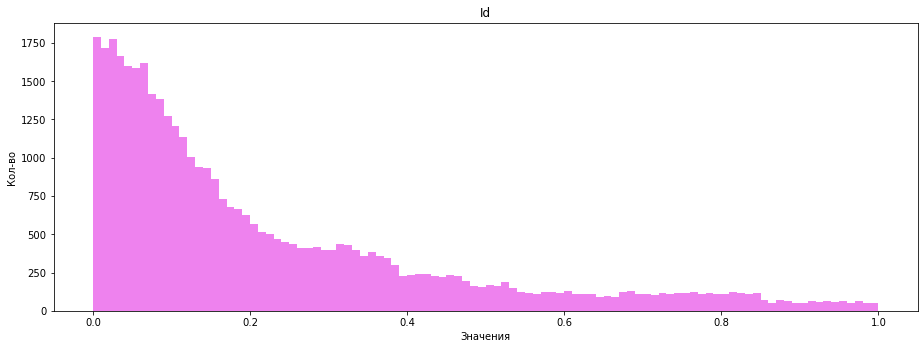

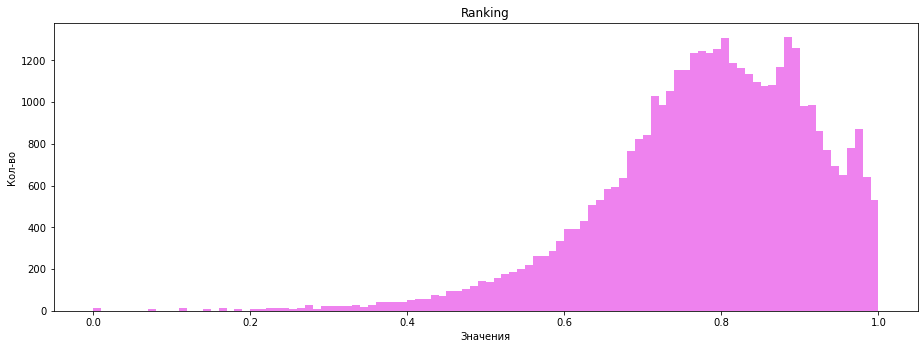

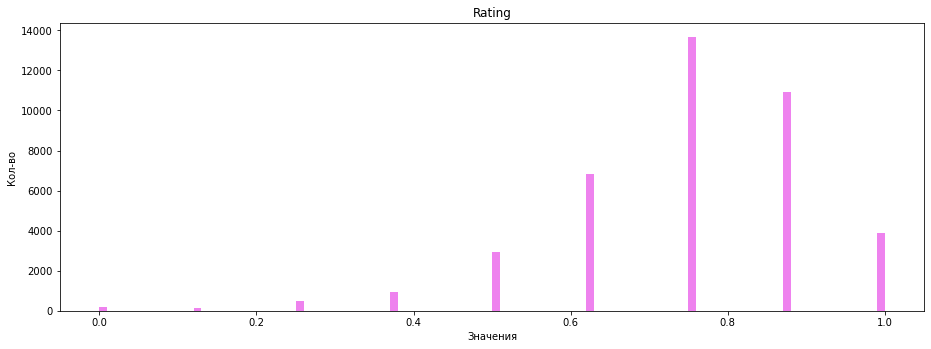

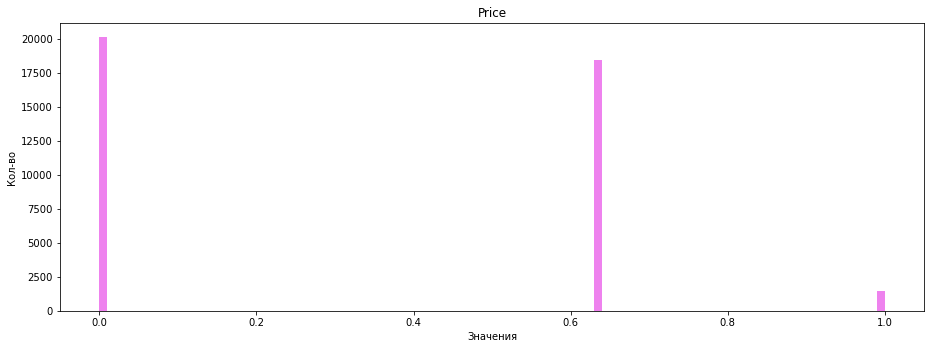

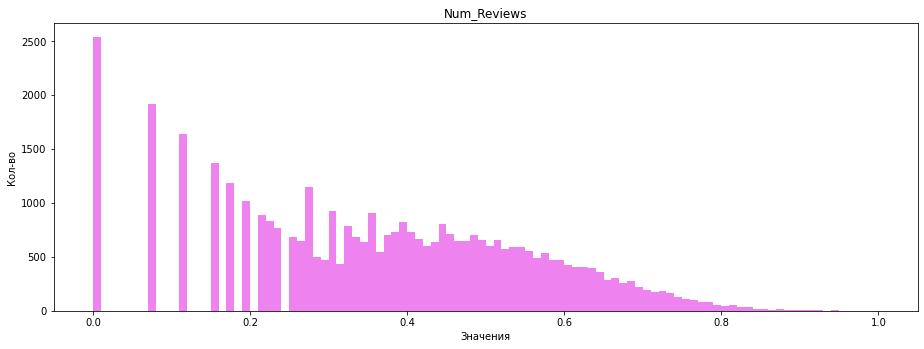

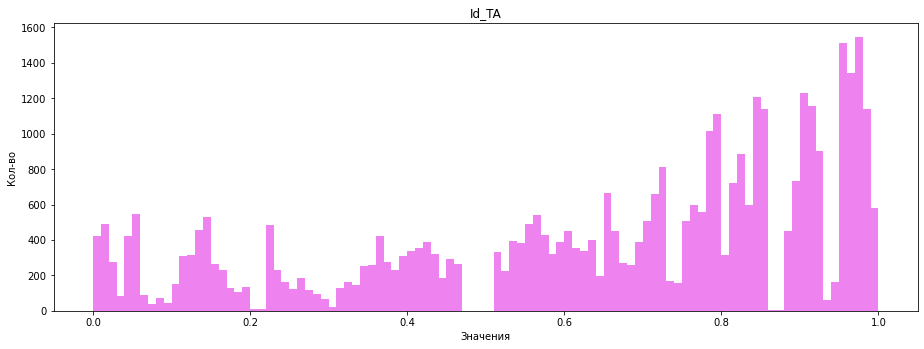

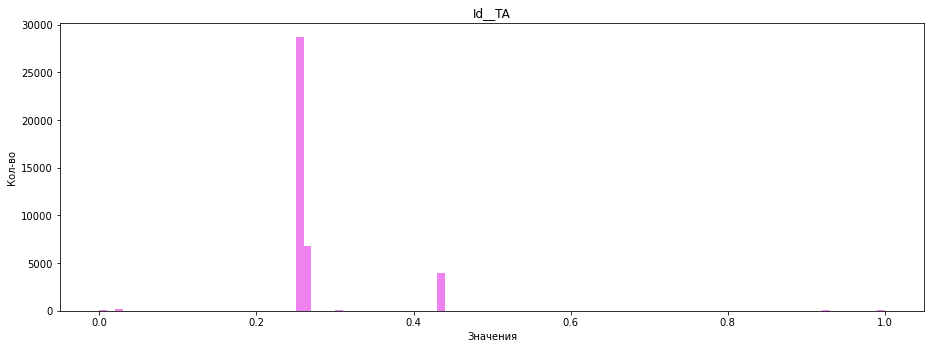

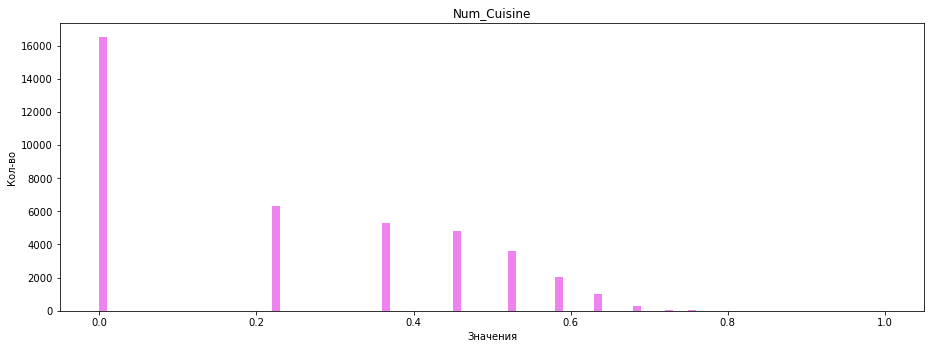

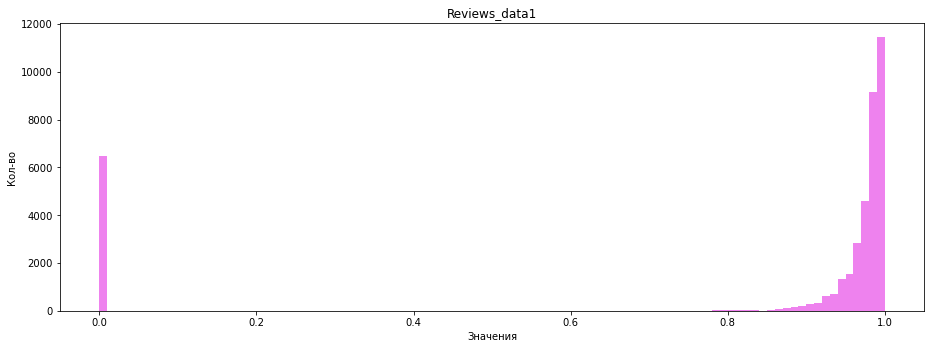

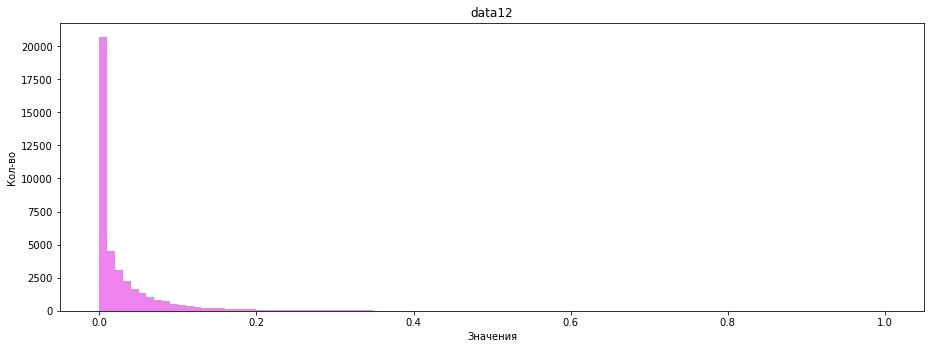

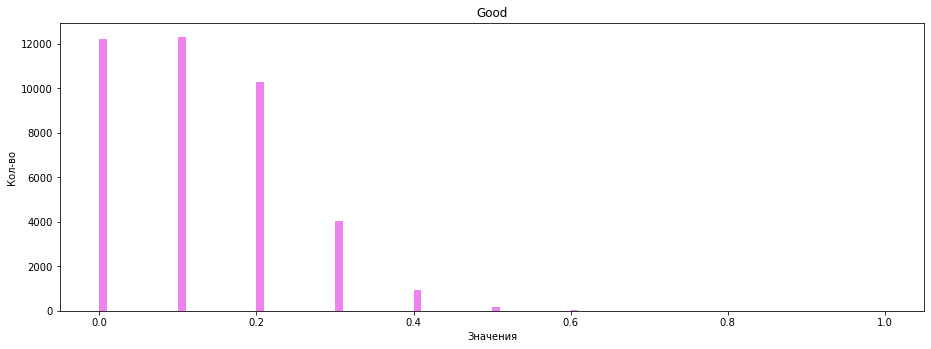

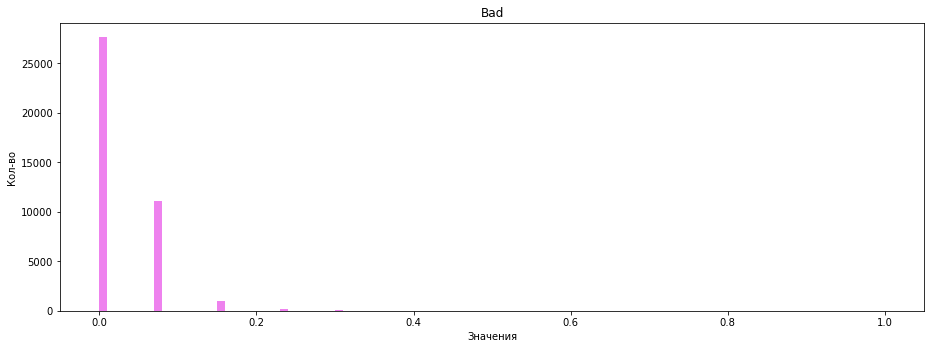

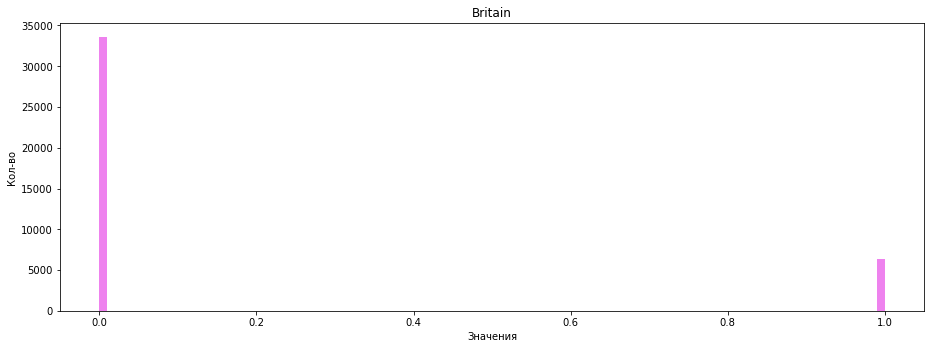

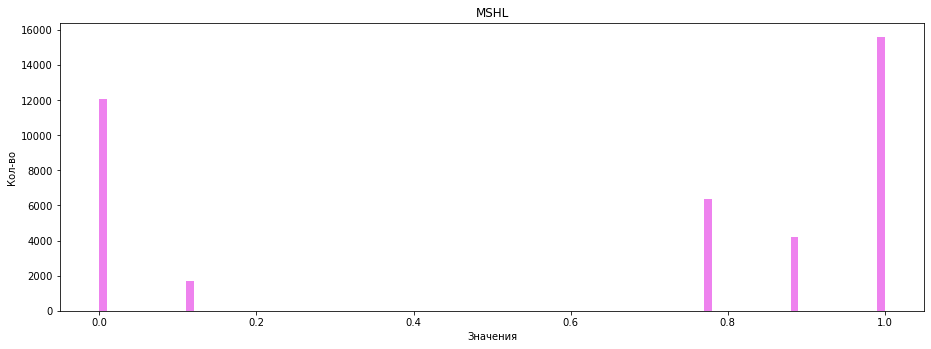

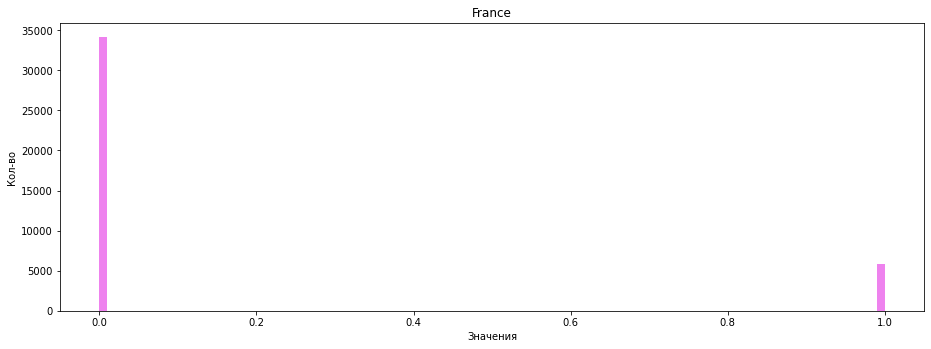

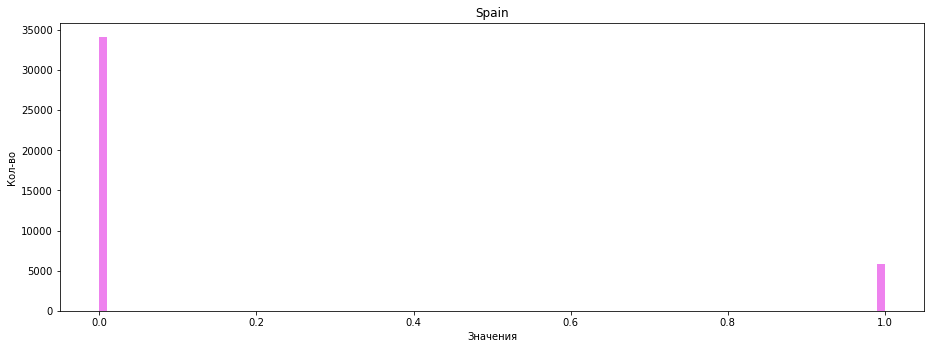

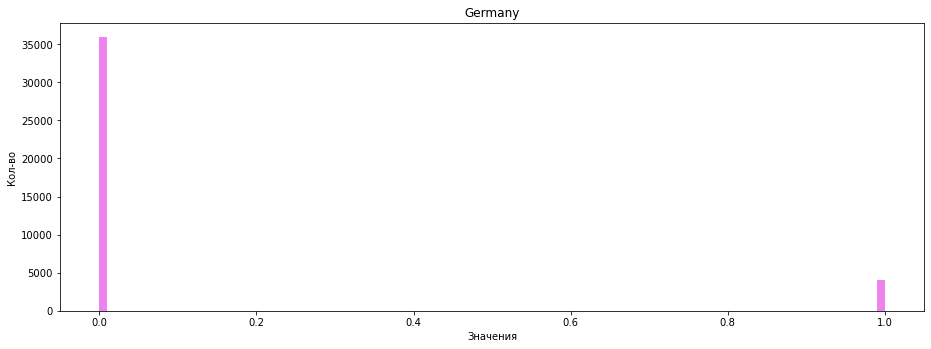

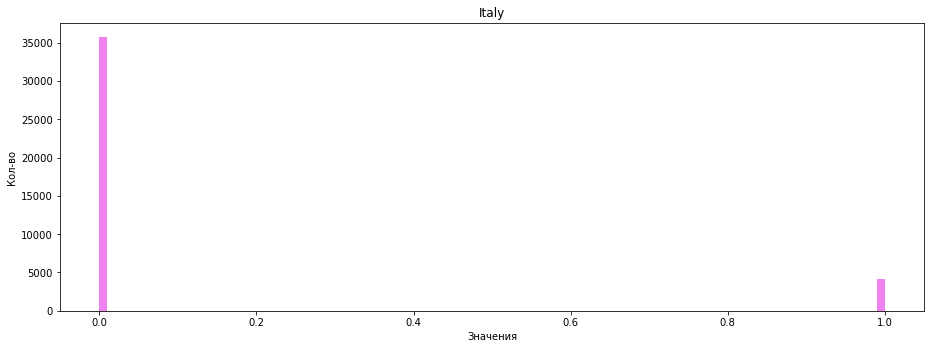

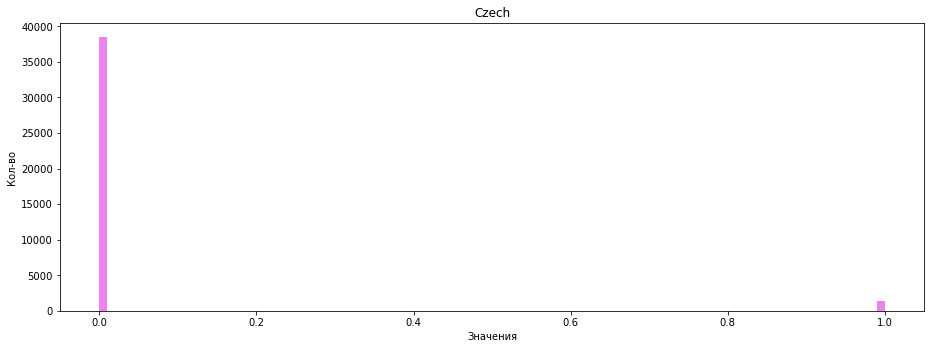

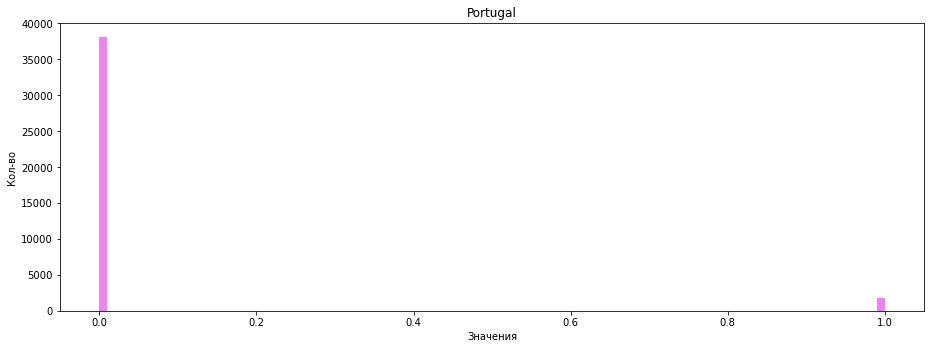

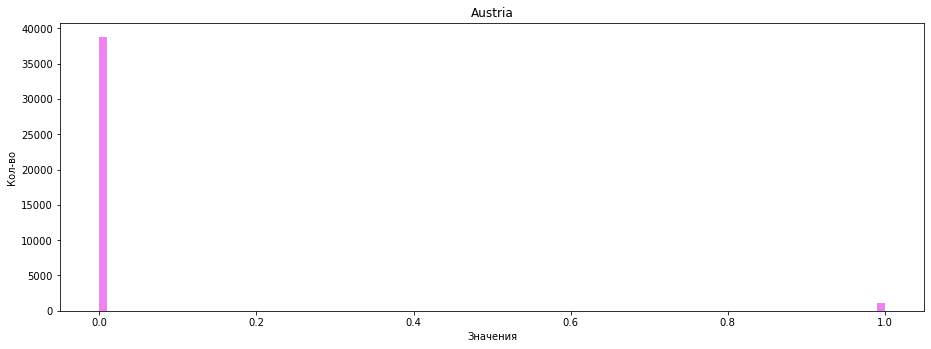

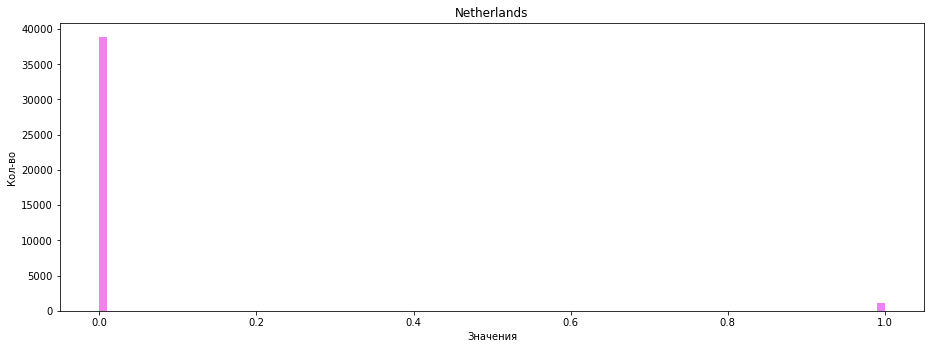

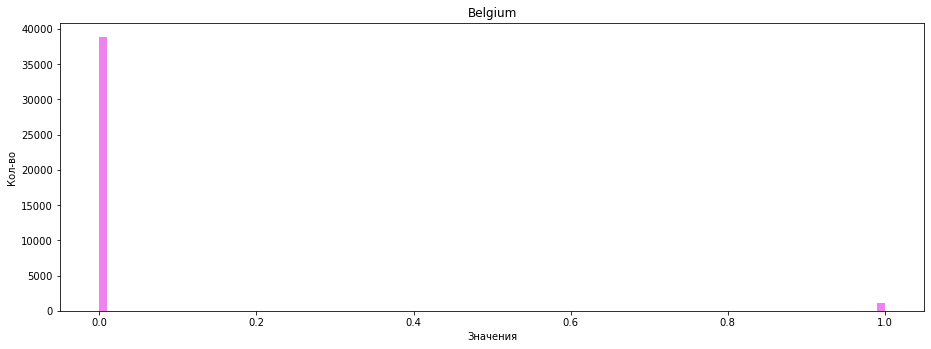

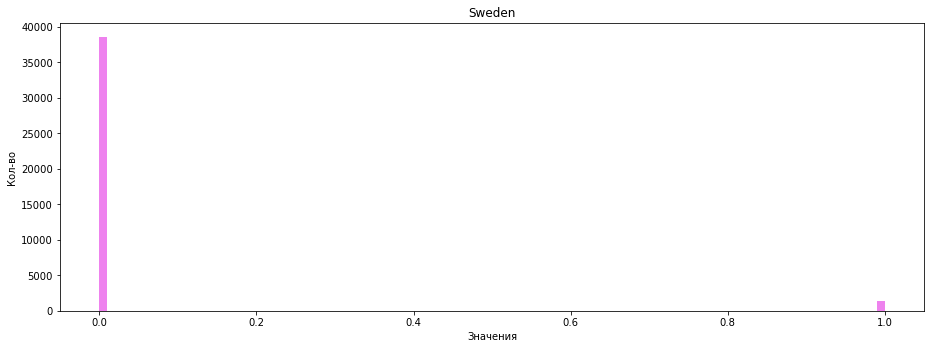

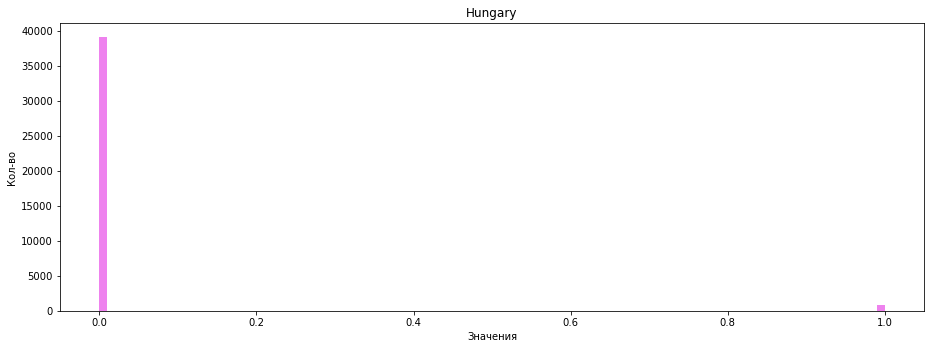

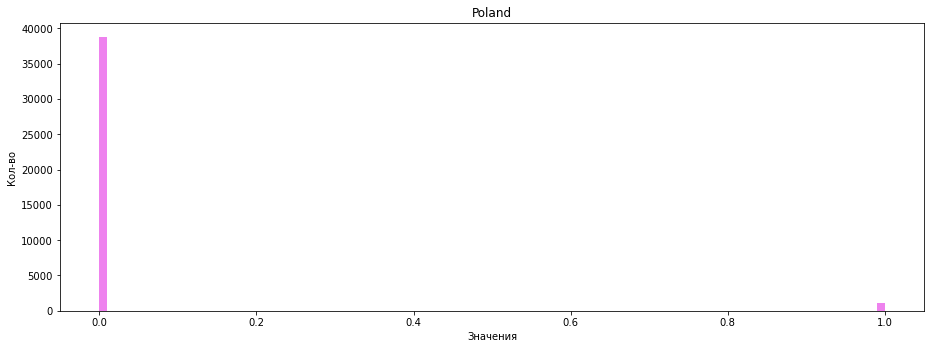

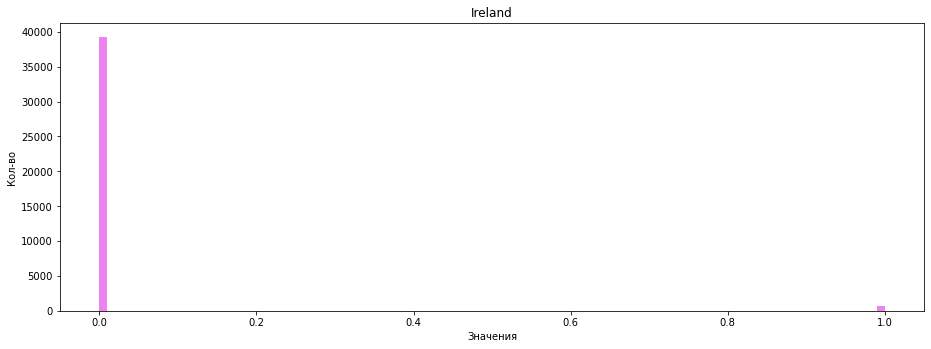

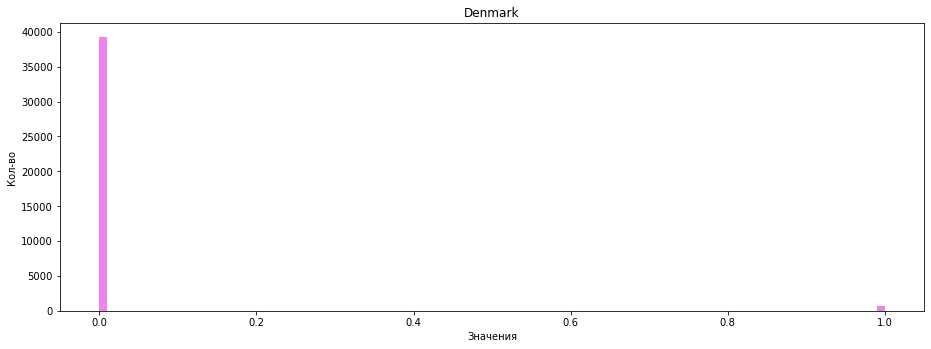

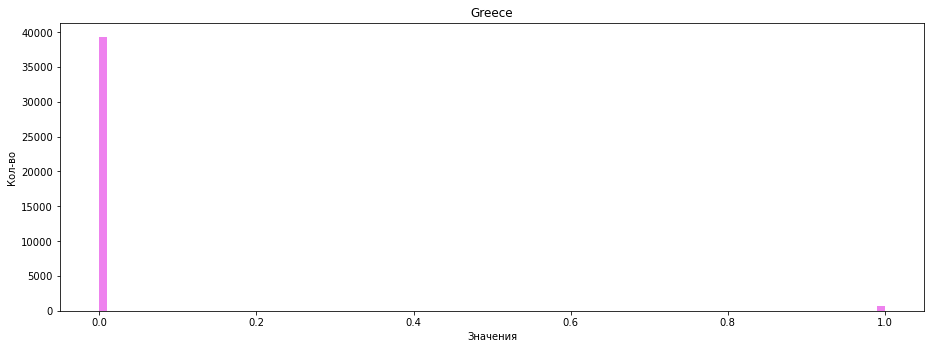

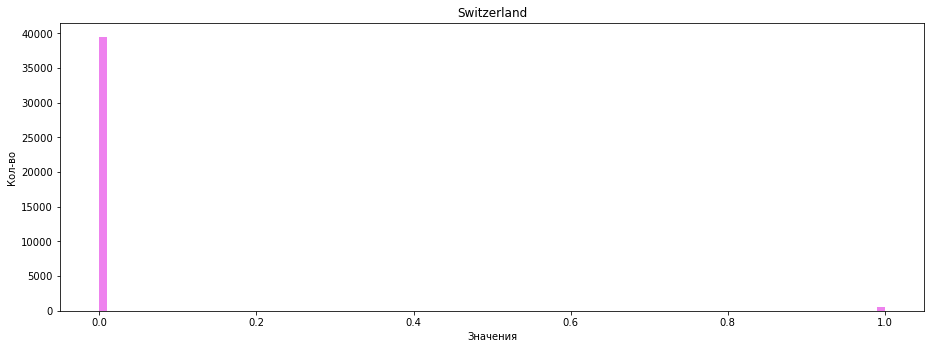

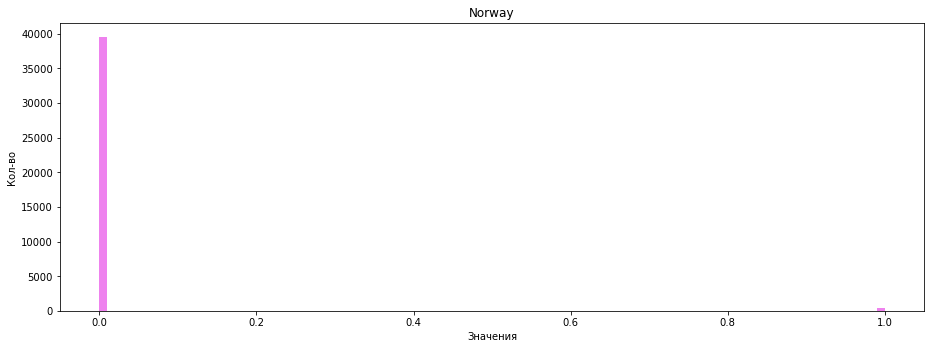

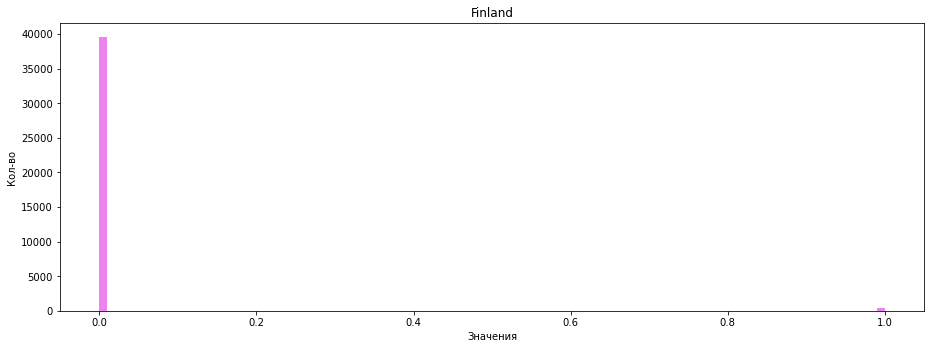

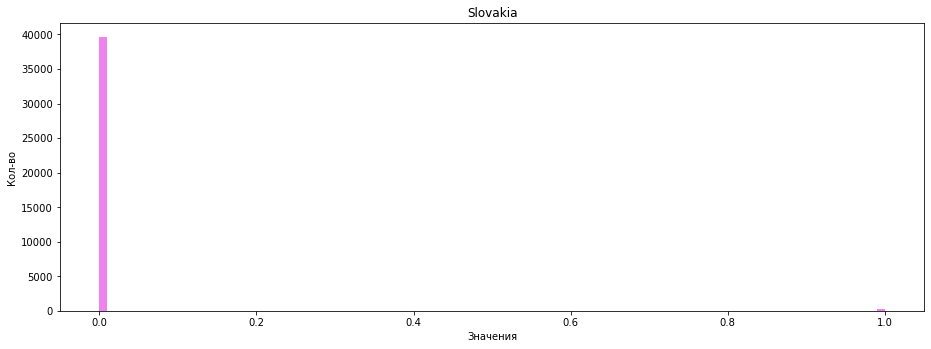

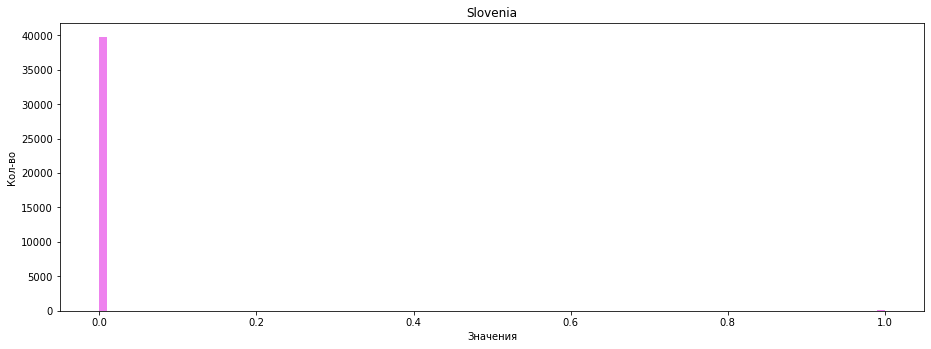

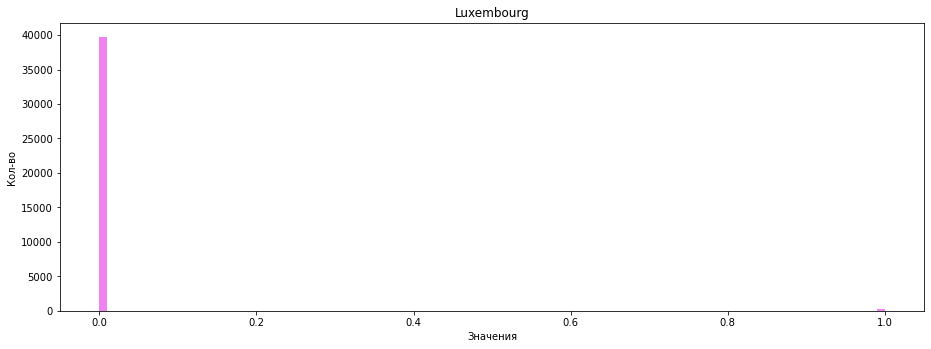

In [13]:
display(df.info()) # корреляция и общая информация о таблице

fl=1 # 0/1 # нормализация
if fl==1:
    Col=df.columns 
    for i in Col:
        df[i]=(df[i]-df[i].min())/(df[i].max()-df[i].min())

display(df.head(3))
display(df.corr())

#print(df.Rating.min(),df.Rating.max())

def graf(n, m, title, xlabel, ylabel):  # построение графика формирование подрисуночной надписи
    fig = plt.figure()
    axes = fig.add_axes([0, 0, n, m])
    axes.set_title(str(title))
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    
for i in df.columns: # анализ столбцов с числовыми данными
    kol=df[i] # значения текущей колонки
    print(i,kol.describe(),end='\n\n')
    graf(2,1,i,'Значения','Кол-во')
    plt.hist(df[i],color='violet',bins=100)
        
fl=0 # 0/1 # исключение выбросов
if fl==1:
    #df['Ranking']=df.Ranking.apply(lambda x: 7500 if x>7500 else x)
    df['Num_Reviews']=df.Num_Reviews.apply(lambda x: 420 if x>420 else x)
    #df['Id_TA']=df.Id_TA.apply(lambda x: 7500 if x>7500 else x)
    #df['Id__TA']=df.Id__TA.apply(lambda x: 400000 if x>400000 else x)
    df['Num_Cuisine']=df.Num_Cuisine.apply(lambda x: 8 if x>8 else x)

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [14]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['Id', 'Rating'], axis = 1) 
y = df['Rating']

In [15]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [16]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [17]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [18]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [19]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred)*4)

MAE: 0.21814250000000002
